In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from fastai.vision import *

In [3]:
data = ImageDataBunch.from_folder("../input/plantvillage-dataset/", train="grayscale", valid_pct=0.1, size=256)

In [4]:
data

ImageDataBunch;

Train: LabelList (293249 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot
Path: ../input/plantvillage-dataset;

Valid: LabelList (32583 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Pepper,_bell___healthy,Tomato___Target_Spot,Pepper,_bell___healthy,Strawberry___Leaf_scorch,Soybean___healthy
Path: ../input/plantvillage-dataset;

Test: None

In [5]:
data.batch_stats()

[tensor([0.3267, 0.3609, 0.3006]), tensor([0.2526, 0.2582, 0.2479])]

In [6]:
data.normalize()

ImageDataBunch;

Train: LabelList (293249 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot,Pepper,_bell___Bacterial_spot
Path: ../input/plantvillage-dataset;

Valid: LabelList (32583 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Pepper,_bell___healthy,Tomato___Target_Spot,Pepper,_bell___healthy,Strawberry___Leaf_scorch,Soybean___healthy
Path: ../input/plantvillage-dataset;

Test: None

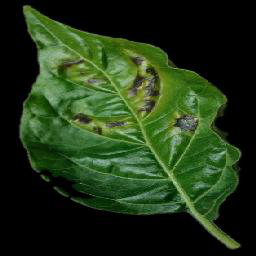

In [7]:
data.open(data.items[10])

In [ ]:
data.show_batch()

In [19]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy, roc_curve], callback_fns=ShowGraph)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [20]:
#learn.fit(5, lr=1e-03)
learn.fit_one_cycle(1)

In [ ]:
learn.lr_find(num_it=1000)

In [21]:
learn.data.classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

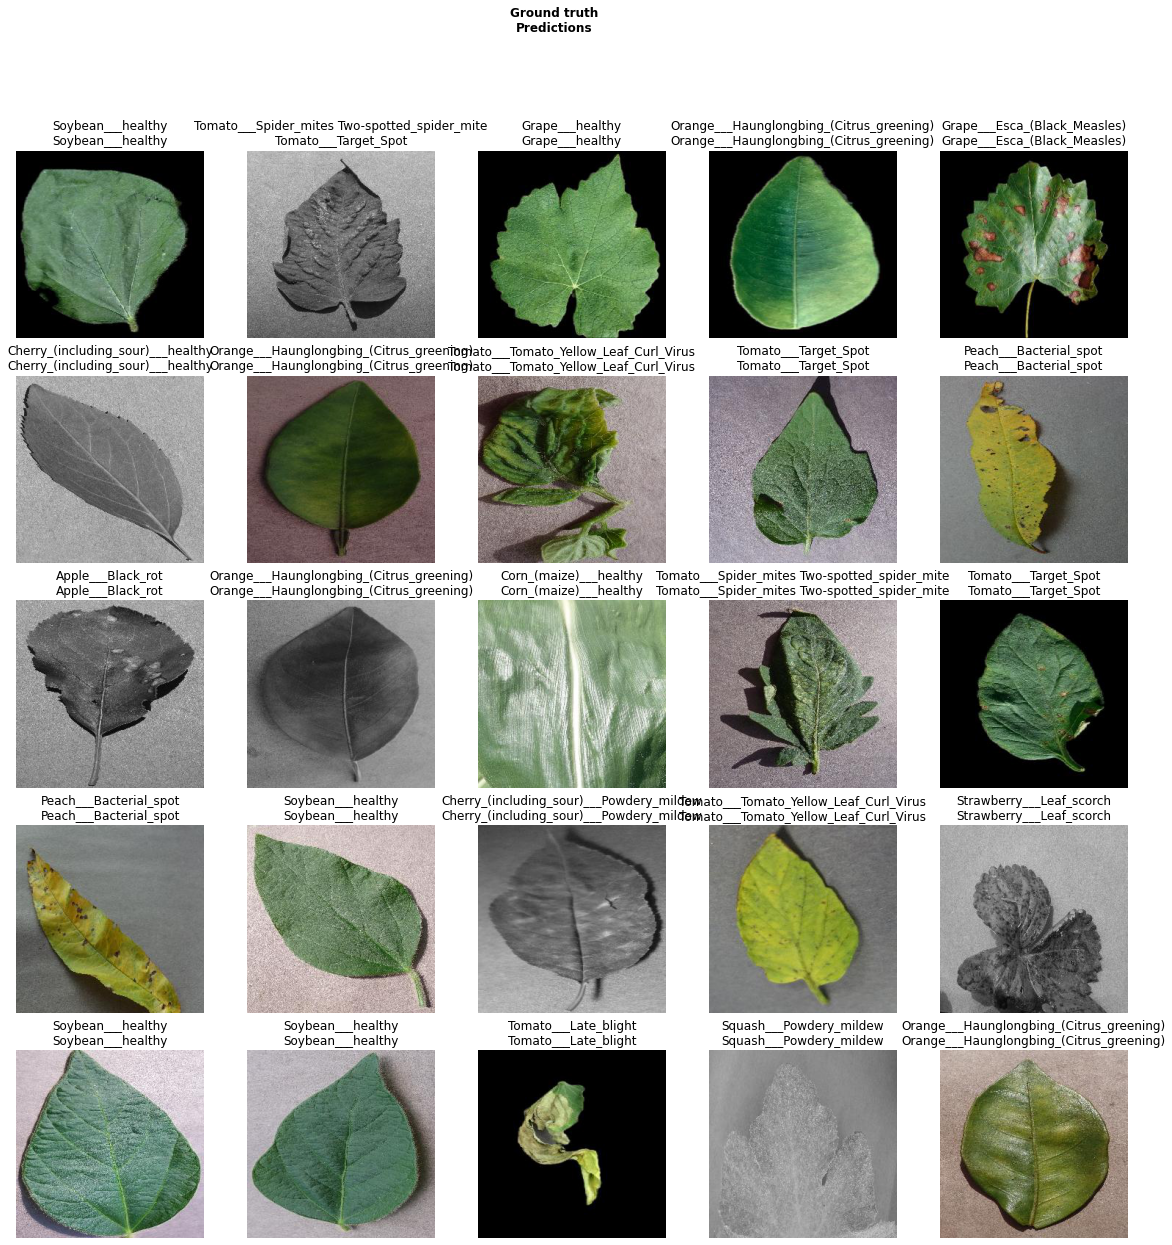

In [22]:
learn.show_results(ds_type=DatasetType.Train)

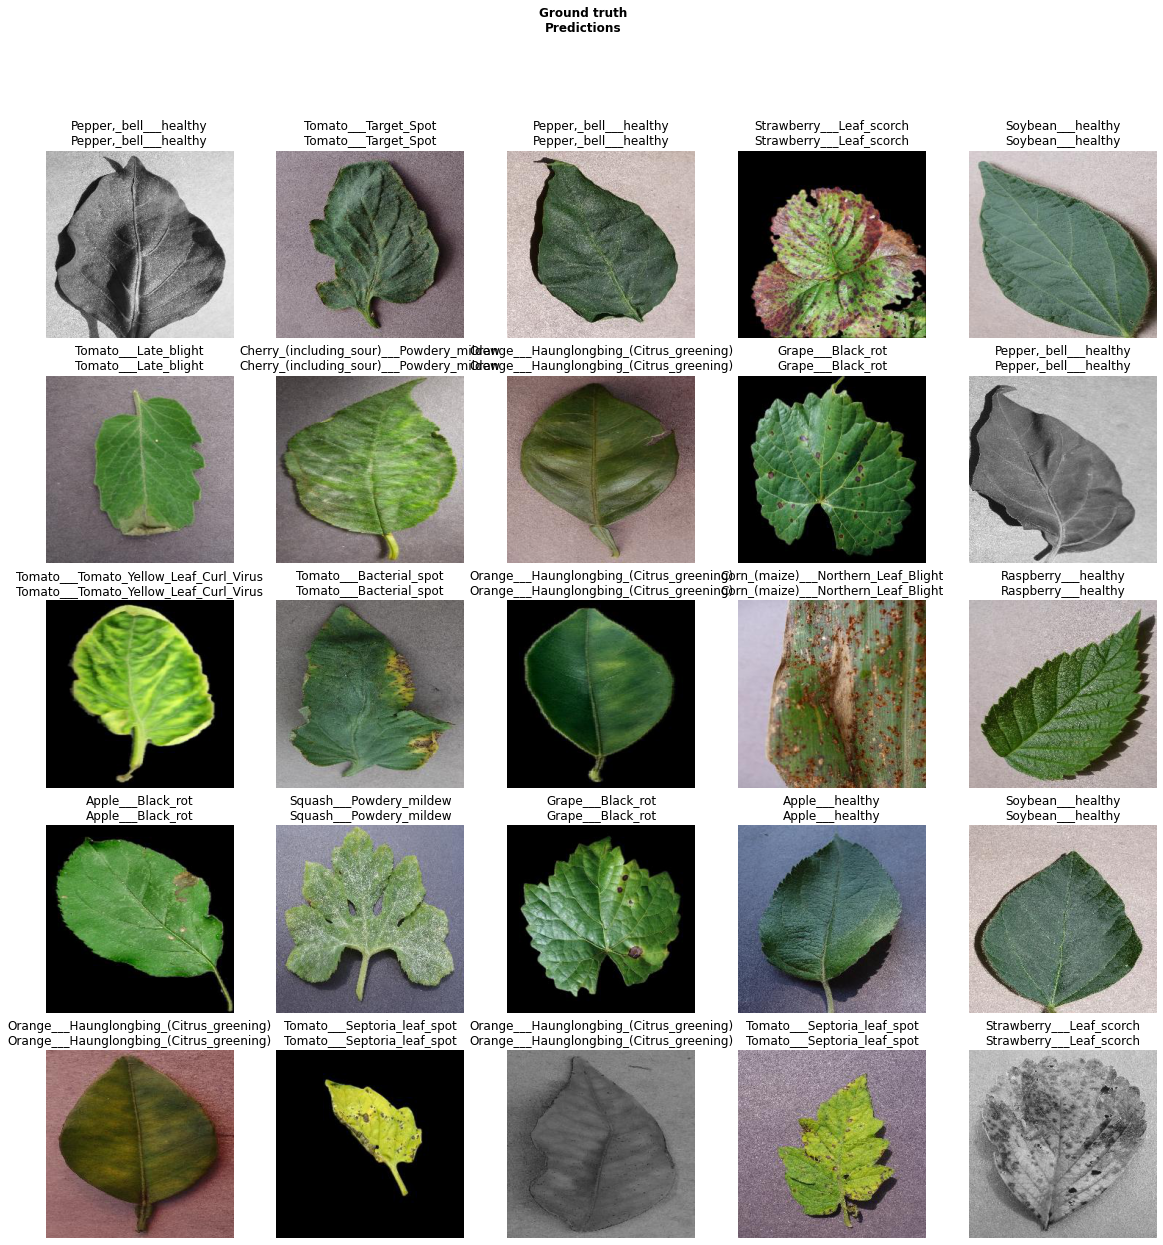

In [23]:
learn.show_results(ds_type=DatasetType.Valid)

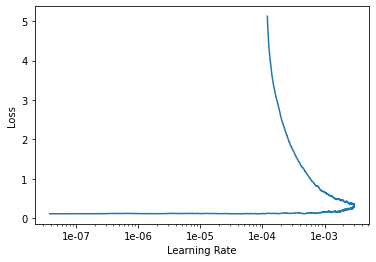

In [25]:
learn.recorder.plot()

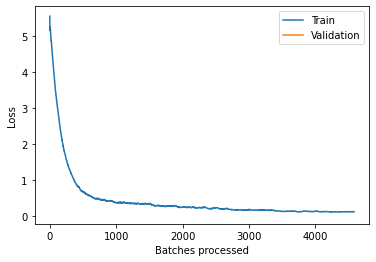

In [26]:
learn.recorder.plot_losses()

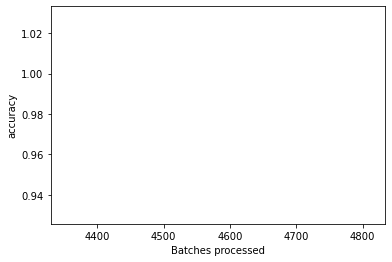

In [27]:
learn.recorder.plot_metrics()

/opt/conda/lib/python3.7/site-packages/fastai/train.py:213: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


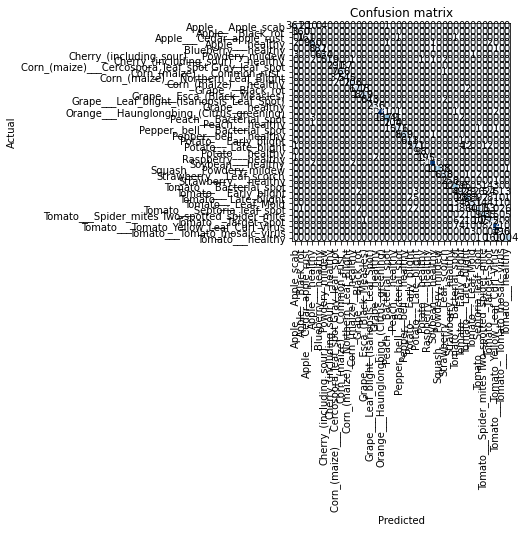

In [28]:
preds,y,losses = learn.get_preds(with_loss=True)
interp = ClassificationInterpretation(learn, preds, y, losses)
interp.plot_confusion_matrix()

In [29]:
interp.most_confused()

[('Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  'Corn_(maize)___Northern_Leaf_Blight',
  37),
 ('Corn_(maize)___Northern_Leaf_Blight',
  'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
  37),
 ('Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 35),
 ('Tomato___Early_blight', 'Tomato___Late_blight', 28),
 ('Tomato___Late_blight', 'Tomato___Early_blight', 28),
 ('Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 26),
 ('Tomato___Early_blight', 'Tomato___Target_Spot', 24),
 ('Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 18),
 ('Tomato___healthy', 'Tomato___Target_Spot', 16),
 ('Tomato___Target_Spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 15),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 13),
 ('Grape___Esca_(Black_Measles)', 'Grape___Black_rot', 12),
 ('Potato___Late_blight', 'Tomato___Late_blight', 12),
 ('Tomato___Septoria_leaf_spot', 'Tomato___Bacterial_spot', 11),
 ('Apple___Apple_scab', 'Apple___healthy', 10),


In [40]:
#learn.model_dir = ""
learn.export(file = Path("/kaggle/working/export.pkl"))

In [44]:
learn = load_learner("/kaggle/working/")

In [47]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
!ls